# paper: FRB 220204aaai

In [1]:
import sys
sys.path.insert(1, '/home/ubuntu/gechen/software/burstfit/examples/')
import import_ipynb
import BurstFit_paper_template as paper_fit

from burstfit.utils.functions import pulse_fn, sgram_fn_vec, sgram_fn, gauss, gauss_norm, model_free_4, model_free_normalized_4, power_law # pulse_fn_vec  
import numpy as np

%matplotlib inline 

importing Jupyter notebook from BurstFit_paper_template.ipynb


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/utils/plotter.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/ubuntu/anac

datacite/tind env not found. Cannot use datacite API


In [4]:
# input variables 
candidate = '220204aaai'
datestring = '2022_2_4_3_17_59'
beam = 209
corr = 'corr13'
dm_heimdall = 612.6
width_heimdall = 4  
snr_heimdall = 16.2

voltage = True
dedisperse = False 
fil_file = '/home/ubuntu/vikram/scratch/' + candidate + '.fil'
mask_chans=[] 
nfreq = 4 
fil_file_dedispersed = '/home/ubuntu/gechen/software/burstfit/fil_files_dedispersed/%s_%d_%s.txt'%(candidate, nfreq, str(voltage))

2022-06-08 01:10:49,070 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-06-08 01:10:49,249 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-06-08 01:10:49,258 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-06-08 01:10:49,284 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (23.45976156988815, 24.190977073767932)


using filterbank  /data/dsa110/T1/corr13/2022_2_4_3_17_59/fil_220204aaai/220204aaai_209.fil


2022-06-08 01:10:49,306 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-06-08 01:10:54,152 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-06-08 01:10:54,161 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-06-08 01:10:56,068 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (48.755005317339545, 34.69404048332097)


using filterbank  /home/ubuntu/vikram/scratch/220204aaai.fil
/home/ubuntu/vikram/scratch/220204aaai.fil 3.2768e-05 0.000262144


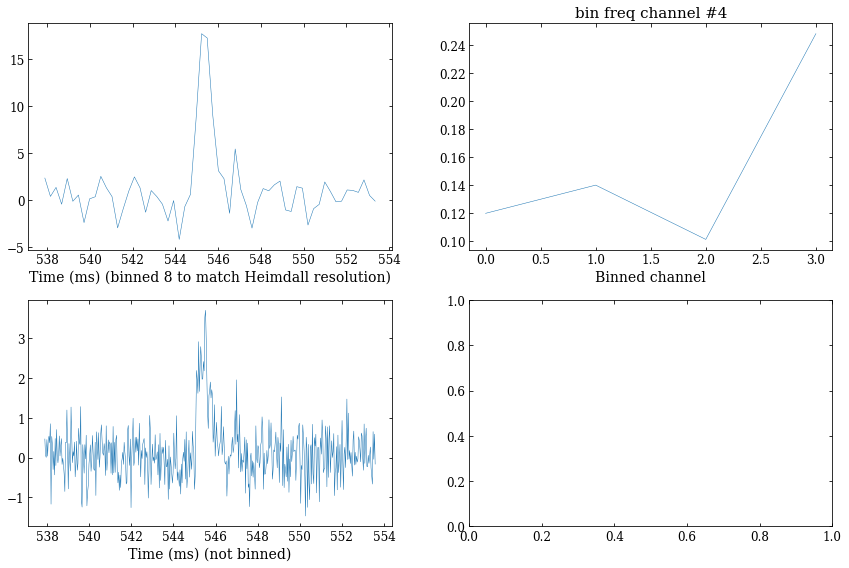

In [7]:
bd_heimdall, fil_file_heimdall  = paper_fit.prepare_bd(candidate, dm_heimdall, width_heimdall, snr_heimdall, 
                           datestring=datestring, beam=beam, corr=corr, 
                           fil_file=fil_file, voltage=False)

bd, fil_file  = paper_fit.prepare_bd(candidate, dm_heimdall, width_heimdall, snr_heimdall, 
                           datestring=datestring, beam=beam, corr=corr, 
                           fil_file=fil_file, voltage=True)


print(fil_file, bd.tsamp, bd_heimdall.tsamp)
data_burst = paper_fit.prepare_burst_data(fil_file, fil_file_dedispersed, candidate, bd_heimdall, bd, voltage = voltage,
                                t_chop_center_s=0.5, t_chop_width = 15 * width_heimdall, 
                               dedisperse=dedisperse, nfreq = nfreq)

## S1: Spectrum--  4 channels, normalized
## T1: Time profile-- Gaussian 
## T2: Time profile-- Gaussian + scattering
## cx: x-components in time profile 

### No scattering

self.function_input_names:  ['S', 'mu', 'sigma']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-08 01:11:29,987 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 01:11:29,988 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 01:11:29,991 - tests -root - INFO - P values: T-test (0.17058), Kruskal (0.30119), KS (0.27301), F-test (0.32473)
2022-06-08 01:11:29,993 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-08 01:11:29,997 - tests -root - INFO - P values: T-test (0.00020), Kruskal (0.00011), KS (0.00005), F-test (0.00260)
2022-06-08 01:11:29,999 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-08 01:11:30,003 - tests -root - INFO - P values: T-test (0.00001), Kruskal (0.00002), KS (0.00017), F-test (0.00906)
2022-06-08 01:11:30,005 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-08 01:11:30,007 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-08 01:11:30,009 - initial_profi

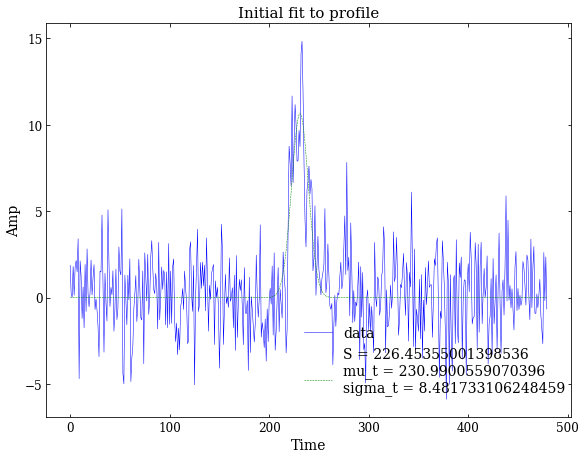

2022-06-08 01:11:30,286 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 01:11:30,288 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7f6cef316400>
[0.24169375 0.31700864 0.24921435 0.62586033]


2022-06-08 01:11:30,294 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 01:11:30,296 - initial_spectrafit -burstfit.fit - INFO - c0: 0.24169375002384186 +- 0.0
2022-06-08 01:11:30,297 - initial_spectrafit -burstfit.fit - INFO - c1: 0.3170086443424225 +- 0.0
2022-06-08 01:11:30,299 - initial_spectrafit -burstfit.fit - INFO - c2: 0.24921435117721558 +- 0.0


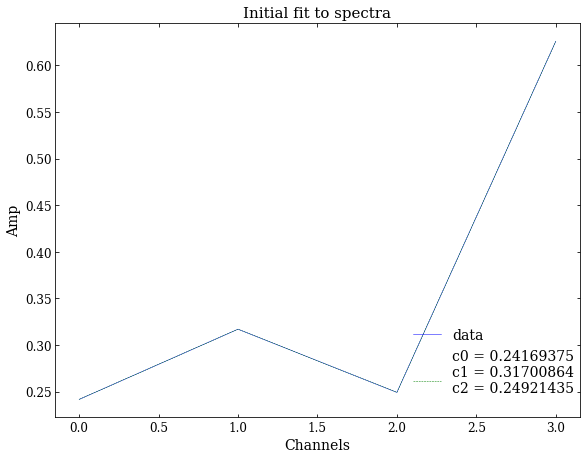

2022-06-08 01:11:30,682 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-08 01:11:30,684 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.24169375, 0.31700864, 0.24921435, 226.45355001398536, 230.9900559070396, 8.481733106248459, 612.6]
2022-06-08 01:11:30,743 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 01:11:30,745 - sgram_fit -burstfit.fit - INFO - c0: 0.21754766595854722 +- 0.032912241563832184
2022-06-08 01:11:30,746 - sgram_fit -burstfit.fit - INFO - c1: 0.3275776778184792 +- 0.027027766439088798
2022-06-08 01:11:30,748 - sgram_fit -burstfit.fit - INFO - c2: 0.25321829087657044 +- 0.02749669154257686
2022-06-08 01:11:30,749 - sgram_fit -burstfit.fit - INFO - S: 177.23454163221749 +- 3.95951471526409
2022-06-08 01:11:30,750 - sgram_fit -burstfit.fit - INFO - mu_t: 230.89601572400815 +- 1.5202449156754074
2022-06-08 01:11:30,752 - sgram_fit -burstfit.fit - INFO - sigma_t: 9.61560462131302 +- 0.249

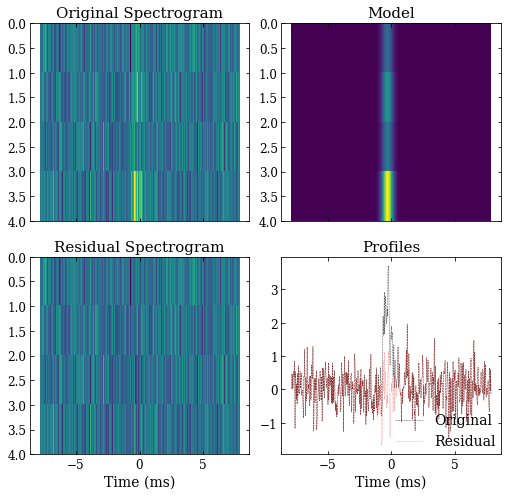

2022-06-08 01:11:31,671 - model -burstfit.fit - INFO - Making model.
2022-06-08 01:11:31,677 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 01:11:31,680 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 01:11:31,681 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 01:11:31,683 - model -burstfit.fit - INFO - Making model.
2022-06-08 01:11:31,684 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 01:11:31,688 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.004091622122975
2022-06-08 01:11:31,689 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-08 01:11:31,691 - fitall -burstfit.fit - INFO - Final number of components = 1. Terminating fitting.
2022-06-08 01:11:31,693 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to 

{bf}.calc_redchisq()= 1.004091622122975


In [9]:
bf_S1T1_c1 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t'], gauss, 
          [(0, 200, 0),(np.inf, 300, 5*bd.width)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 1, plot = True)

self.function_input_names:  ['S', 'mu', 'sigma']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-08 01:11:41,616 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 01:11:41,618 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 01:11:41,621 - tests -root - INFO - P values: T-test (0.17058), Kruskal (0.30119), KS (0.27301), F-test (0.32473)
2022-06-08 01:11:41,623 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-08 01:11:41,626 - tests -root - INFO - P values: T-test (0.00020), Kruskal (0.00011), KS (0.00005), F-test (0.00260)
2022-06-08 01:11:41,628 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-08 01:11:41,631 - tests -root - INFO - P values: T-test (0.00001), Kruskal (0.00002), KS (0.00017), F-test (0.00906)
2022-06-08 01:11:41,632 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-08 01:11:41,634 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-08 01:11:41,636 - initial_profi

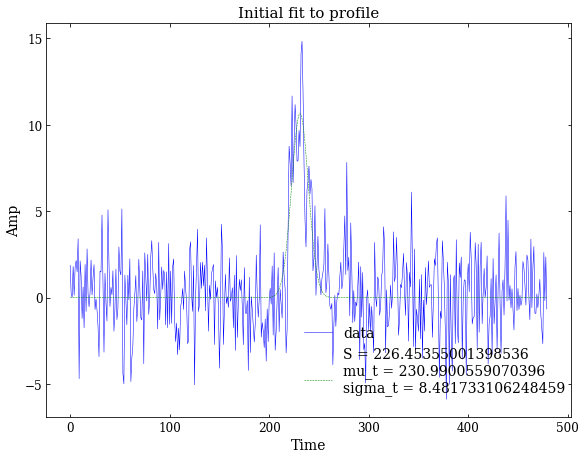

2022-06-08 01:11:41,884 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 01:11:41,886 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7f6cef316400>
[0.24169375 0.31700864 0.24921435 0.62586033]


2022-06-08 01:11:41,891 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 01:11:41,892 - initial_spectrafit -burstfit.fit - INFO - c0: 0.24169375002384186 +- 0.0
2022-06-08 01:11:41,894 - initial_spectrafit -burstfit.fit - INFO - c1: 0.3170086443424225 +- 0.0
2022-06-08 01:11:41,895 - initial_spectrafit -burstfit.fit - INFO - c2: 0.24921435117721558 +- 0.0


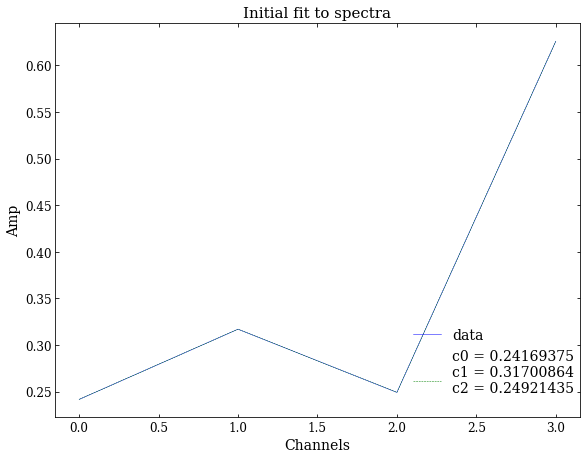

2022-06-08 01:11:42,061 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-08 01:11:42,063 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.24169375, 0.31700864, 0.24921435, 226.45355001398536, 230.9900559070396, 8.481733106248459, 612.6]
2022-06-08 01:11:42,128 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 01:11:42,132 - sgram_fit -burstfit.fit - INFO - c0: 0.21754766595854722 +- 0.032912241563832184
2022-06-08 01:11:42,137 - sgram_fit -burstfit.fit - INFO - c1: 0.3275776778184792 +- 0.027027766439088798
2022-06-08 01:11:42,141 - sgram_fit -burstfit.fit - INFO - c2: 0.25321829087657044 +- 0.02749669154257686
2022-06-08 01:11:42,146 - sgram_fit -burstfit.fit - INFO - S: 177.23454163221749 +- 3.95951471526409
2022-06-08 01:11:42,148 - sgram_fit -burstfit.fit - INFO - mu_t: 230.89601572400815 +- 1.5202449156754074
2022-06-08 01:11:42,151 - sgram_fit -burstfit.fit - INFO - sigma_t: 9.61560462131302 +- 0.249

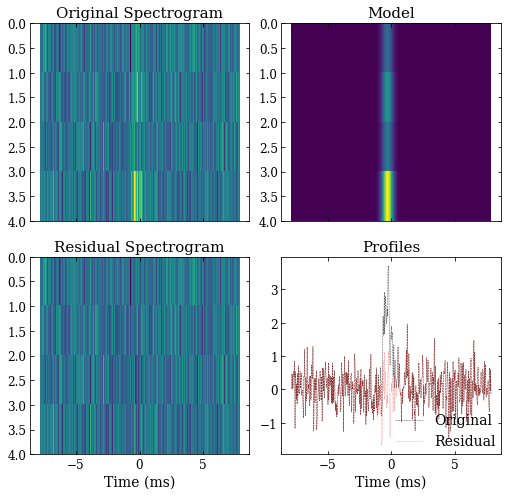

2022-06-08 01:11:42,838 - model -burstfit.fit - INFO - Making model.
2022-06-08 01:11:42,840 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 01:11:42,843 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 01:11:42,845 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 01:11:42,846 - model -burstfit.fit - INFO - Making model.
2022-06-08 01:11:42,847 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 01:11:42,850 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.004091622122975
2022-06-08 01:11:42,851 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 2
2022-06-08 01:11:42,852 - fitcycle -burstfit.fit - INFO - Fitting component 2.
2022-06-08 01:11:42,853 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 2
2022-06-08 01:11:42,871 - initial_profilef

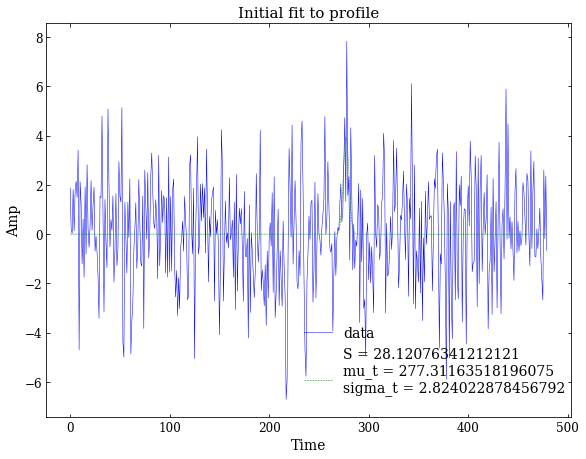

2022-06-08 01:11:43,058 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 01:11:43,061 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 2


<function model_free_normalized_4 at 0x7f6cef316400>
[0.2934547826712753 0.2280739641409022 0.23238287616050537
 0.7856315367259096]


2022-06-08 01:11:43,069 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 01:11:43,071 - initial_spectrafit -burstfit.fit - INFO - c0: 0.2934547826712753 +- 0.0
2022-06-08 01:11:43,072 - initial_spectrafit -burstfit.fit - INFO - c1: 0.2280739641409022 +- 0.0
2022-06-08 01:11:43,074 - initial_spectrafit -burstfit.fit - INFO - c2: 0.23238287616050537 +- 0.0


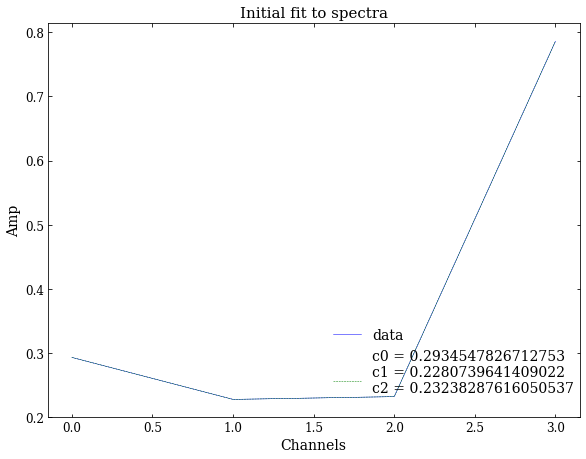

2022-06-08 01:11:43,330 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 2
2022-06-08 01:11:43,331 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.2934547826712753, 0.2280739641409022, 0.23238287616050537, 28.12076341212121, 277.31163518196075, 2.824022878456792, 612.6]
2022-06-08 01:11:43,465 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 01:11:43,474 - sgram_fit -burstfit.fit - INFO - c0: 0.44651417691200096 +- 0.14286266861564917
2022-06-08 01:11:43,476 - sgram_fit -burstfit.fit - INFO - c1: 0.18072478094024452 +- 0.11760033629109892
2022-06-08 01:11:43,478 - sgram_fit -burstfit.fit - INFO - c2: 0.26892728298163343 +- 0.11748996134745489
2022-06-08 01:11:43,480 - sgram_fit -burstfit.fit - INFO - S: 20.328729088971453 +- 35.58322671461071
2022-06-08 01:11:43,482 - sgram_fit -burstfit.fit - INFO - mu_t: 274.52964016607706 +- 1.0870787226427658
2022-06-08 01:11:43,484 - sgram_fit -burstfit.fit - INFO - sigma_t: 

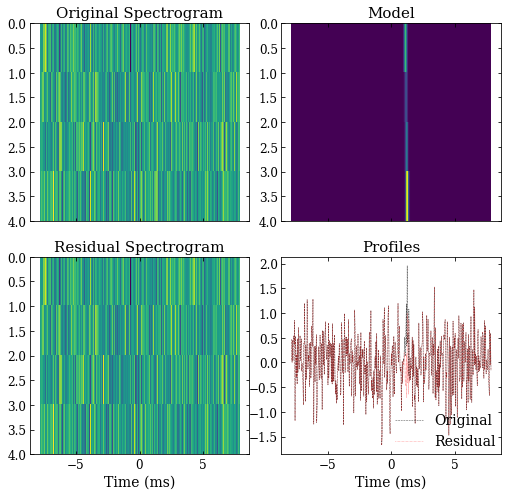

2022-06-08 01:11:44,068 - model -burstfit.fit - INFO - Making model.
2022-06-08 01:11:44,070 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 01:11:44,074 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 01:11:44,076 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 01:11:44,077 - model -burstfit.fit - INFO - Making model.
2022-06-08 01:11:44,079 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 01:11:44,083 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 0.993514617048692
2022-06-08 01:11:44,085 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-08 01:11:44,086 - fitall -burstfit.fit - INFO - Final number of components 2 > 1. Fitting all components together.
2022-06-08 01:11:44,088 - fit_all_components -burstfit.fit - INFO - Fitting 2 components together.
2022-0

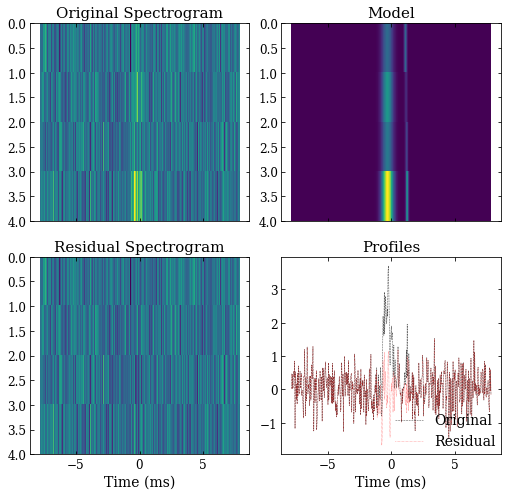

2022-06-08 01:11:44,702 - model -burstfit.fit - INFO - Making model.
2022-06-08 01:11:44,704 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 01:11:44,708 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 01:11:44,709 - get_off_pulse_region -burstfit.fit - INFO - Using sgram all-component-fit parameters.
2022-06-08 01:11:44,711 - model -burstfit.fit - INFO - Making model.
2022-06-08 01:11:44,713 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 01:11:44,717 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 0.993514617048692
2022-06-08 01:11:44,719 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 01:11:44,720 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 01:11:44,724 - tests -root - INFO - P values: T-test (0.17058), Kruskal (0.30119), KS (0.27301), F-test (0.32473)
2022-06-08 01:11

{bf}.calc_redchisq()= 0.993514617048692


In [10]:
bf_S1T1_c2 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t'], gauss, 
          [(0, 200, 0),(np.inf, 300, 5*bd.width)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 2, plot = True)

### with scattering

self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-08 01:11:57,257 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 01:11:57,261 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 01:11:57,269 - tests -root - INFO - P values: T-test (0.17058), Kruskal (0.30119), KS (0.27301), F-test (0.32473)
2022-06-08 01:11:57,275 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-08 01:11:57,283 - tests -root - INFO - P values: T-test (0.00020), Kruskal (0.00011), KS (0.00005), F-test (0.00260)
2022-06-08 01:11:57,290 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-08 01:11:57,298 - tests -root - INFO - P values: T-test (0.00001), Kruskal (0.00002), KS (0.00017), F-test (0.00906)
2022-06-08 01:11:57,305 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-08 01:11:57,307 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-08 01:11:57,313 - initial_profi

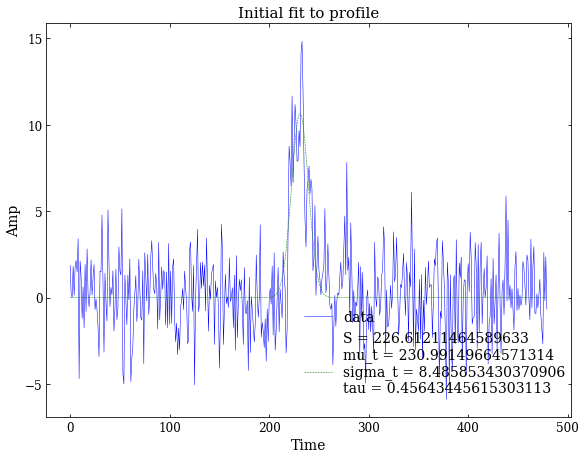

2022-06-08 01:11:57,750 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 01:11:57,752 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7f6cef316400>
[0.24169375 0.31700864 0.24921435 0.62586033]


2022-06-08 01:11:57,757 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 01:11:57,758 - initial_spectrafit -burstfit.fit - INFO - c0: 0.24169375002384186 +- 0.0
2022-06-08 01:11:57,759 - initial_spectrafit -burstfit.fit - INFO - c1: 0.3170086443424225 +- 0.0
2022-06-08 01:11:57,761 - initial_spectrafit -burstfit.fit - INFO - c2: 0.24921435117721558 +- 0.0


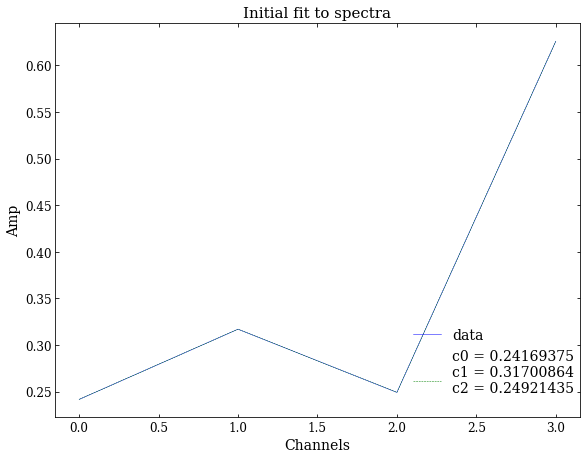

2022-06-08 01:11:58,061 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-08 01:11:58,067 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.24169375, 0.31700864, 0.24921435, 226.61211464589633, 230.99149664571314, 8.485853430370906, 0.45643445615303113, 612.6]
2022-06-08 01:11:58,171 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-06-08 01:11:59,406 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 01:11:59,409 - sgram_fit -burstfit.fit - INFO - c0: 0.22235305228852056 +- 0.02858674770066429
2022-06-08 01:11:59,410 - sgram_fit -burstfit.fit - INFO - c1: 0.33372461535230585 +- 0.023366872629643314
2022-06-08 01:11:59,412 - sgram_fit -burstfit.fit - INFO - c2: 0.26510123712730227 +- 0.02341255572583234
2022-06-08 01:11:59,414 - sgram_fit -burstfit.fit - INFO - S: 192.57035972998958 +- 9.086190343035991
2022-06-08 01:11:59,416 - sgram_fit -burstfit.fit 

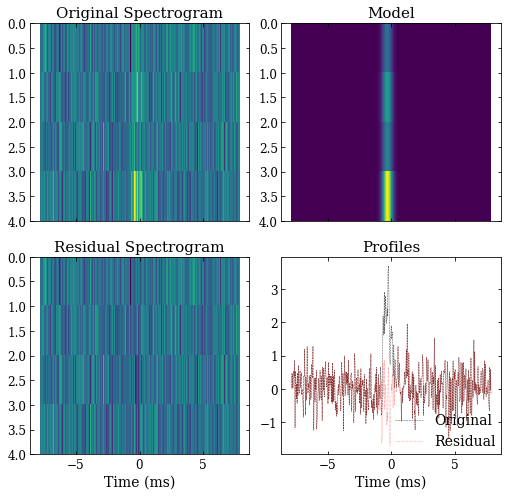

2022-06-08 01:12:00,179 - model -burstfit.fit - INFO - Making model.
2022-06-08 01:12:00,182 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 01:12:00,186 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 01:12:00,188 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 01:12:00,191 - model -burstfit.fit - INFO - Making model.
2022-06-08 01:12:00,201 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 01:12:00,207 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 0.9829736808366744
2022-06-08 01:12:00,210 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-08 01:12:00,214 - fitall -burstfit.fit - INFO - Final number of components = 1. Terminating fitting.
2022-06-08 01:12:00,217 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to

{bf}.calc_redchisq()= 0.9829736808366744


In [11]:
bf_S1T2_c1 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t', 'tau'], pulse_fn, 
          [(0, 200, 0, 0),(np.inf, 300, 5*bd.width, np.inf)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 1, plot = True)


self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-08 21:52:52,509 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 21:52:52,511 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 21:52:52,521 - tests -root - INFO - P values: T-test (0.17058), Kruskal (0.30119), KS (0.27301), F-test (0.32473)
2022-06-08 21:52:52,523 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-08 21:52:52,526 - tests -root - INFO - P values: T-test (0.00020), Kruskal (0.00011), KS (0.00005), F-test (0.00260)
2022-06-08 21:52:52,527 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-08 21:52:52,530 - tests -root - INFO - P values: T-test (0.00001), Kruskal (0.00002), KS (0.00017), F-test (0.00906)
2022-06-08 21:52:52,531 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-08 21:52:52,533 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-08 21:52:52,536 - initial_profi

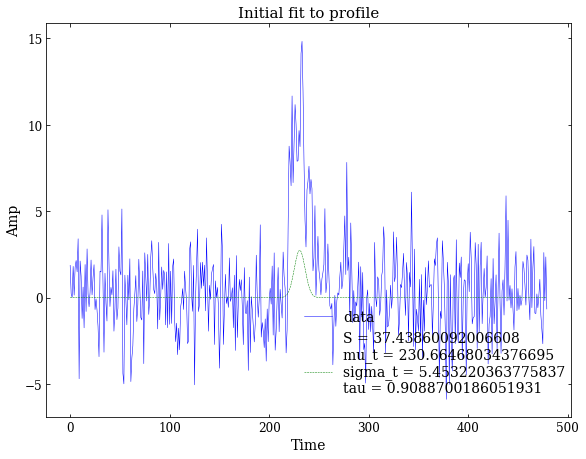

2022-06-08 21:52:52,910 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 21:52:52,913 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7f6cef316400>
[0.22440232 0.33752614 0.21701795 0.6665095 ]


2022-06-08 21:52:52,920 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 21:52:52,923 - initial_spectrafit -burstfit.fit - INFO - c0: 0.2244023233652115 +- 0.0
2022-06-08 21:52:52,925 - initial_spectrafit -burstfit.fit - INFO - c1: 0.3375261425971985 +- 0.0
2022-06-08 21:52:52,927 - initial_spectrafit -burstfit.fit - INFO - c2: 0.21701794862747192 +- 0.0


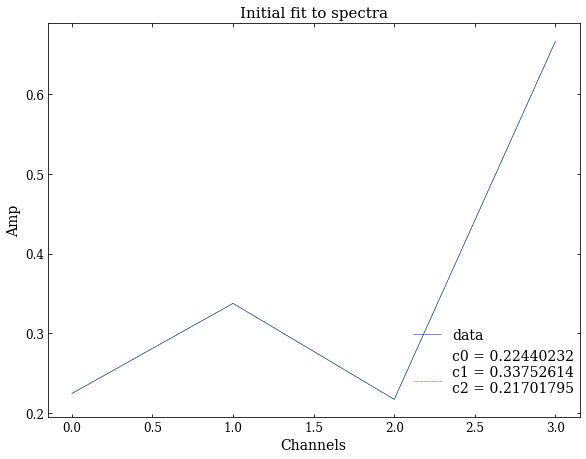

2022-06-08 21:52:53,069 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-08 21:52:53,071 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.22440232, 0.33752614, 0.21701795, 37.43860092006608, 230.66468034376695, 5.453220363775837, 0.9088700186051931, 612.6]
2022-06-08 21:52:53,175 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 21:52:53,178 - sgram_fit -burstfit.fit - INFO - c0: 0.6360233818090056 +- 0.10680927659649862
2022-06-08 21:52:53,180 - sgram_fit -burstfit.fit - INFO - c1: 0.8631218634997182 +- 0.1085763503026739
2022-06-08 21:52:53,183 - sgram_fit -burstfit.fit - INFO - c2: -1.0940618557789066 +- 0.1459857639435694
2022-06-08 21:52:53,185 - sgram_fit -burstfit.fit - INFO - S: 48.4575847035537 +- 1.6052674688509432
2022-06-08 21:52:53,187 - sgram_fit -burstfit.fit - INFO - mu_t: 230.6373220538271 +- 0.958641060502606
2022-06-08 21:52:53,189 - sgram_fit -burstfit.fit - INFO - sigma_t: 6.3856547238

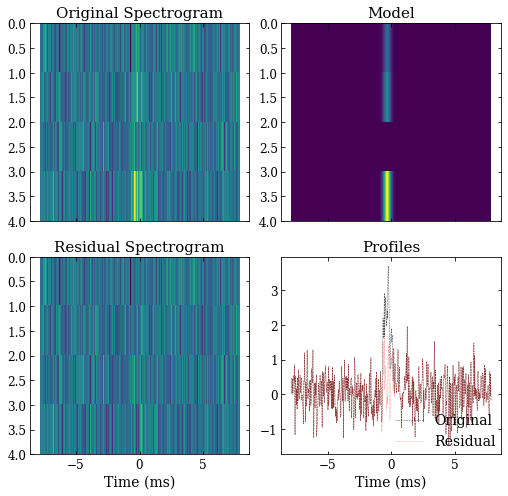

2022-06-08 21:52:53,577 - model -burstfit.fit - INFO - Making model.
2022-06-08 21:52:53,579 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 21:52:53,582 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 21:52:53,584 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 21:52:53,586 - model -burstfit.fit - INFO - Making model.
2022-06-08 21:52:53,587 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 21:52:53,591 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.017623848512383
2022-06-08 21:52:53,593 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 2
2022-06-08 21:52:53,594 - fitcycle -burstfit.fit - INFO - Fitting component 2.
2022-06-08 21:52:53,596 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 2
2022-06-08 21:52:53,637 - initial_profilef

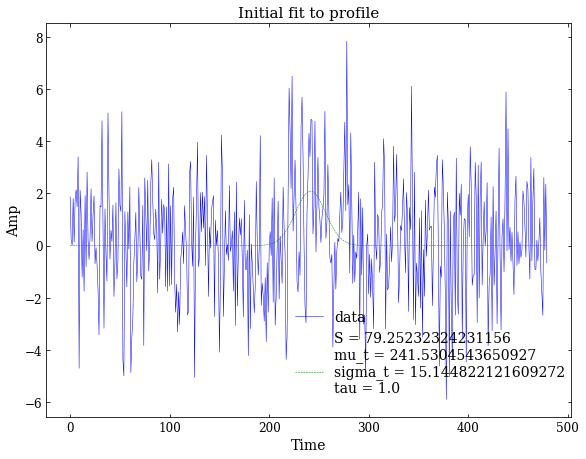

2022-06-08 21:52:53,908 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 21:52:53,911 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 2


<function model_free_normalized_4 at 0x7f6cef316400>
[0.041419451477931 0.18107117130542794 0.6339347940430003
 0.32856861782521246]


2022-06-08 21:52:53,915 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 21:52:53,916 - initial_spectrafit -burstfit.fit - INFO - c0: 0.041419451477931 +- 0.0
2022-06-08 21:52:53,918 - initial_spectrafit -burstfit.fit - INFO - c1: 0.18107117130542794 +- 0.0
2022-06-08 21:52:53,919 - initial_spectrafit -burstfit.fit - INFO - c2: 0.6339347940430003 +- 0.0


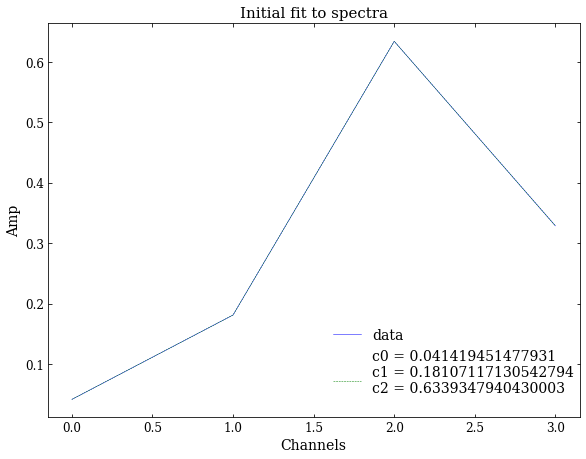

2022-06-08 21:52:54,083 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 2
2022-06-08 21:52:54,086 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.041419451477931, 0.18107117130542794, 0.6339347940430003, 79.25232324231156, 241.5304543650927, 15.144822121609272, 1.0, 612.6]
2022-06-08 21:52:54,212 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-06-08 21:52:54,886 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 21:52:54,892 - sgram_fit -burstfit.fit - INFO - c0: 0.04389749672719774 +- 0.09313762729162683
2022-06-08 21:52:54,897 - sgram_fit -burstfit.fit - INFO - c1: 0.19178602325861047 +- 0.0766754497360787
2022-06-08 21:52:54,901 - sgram_fit -burstfit.fit - INFO - c2: 0.6510383838315911 +- 0.0770856362516125
2022-06-08 21:52:54,905 - sgram_fit -burstfit.fit - INFO - S: 79.1741512397664 +- 6.521483909452259
2022-06-08 21:52:54,907 - sgram_fit -burstfit.fit

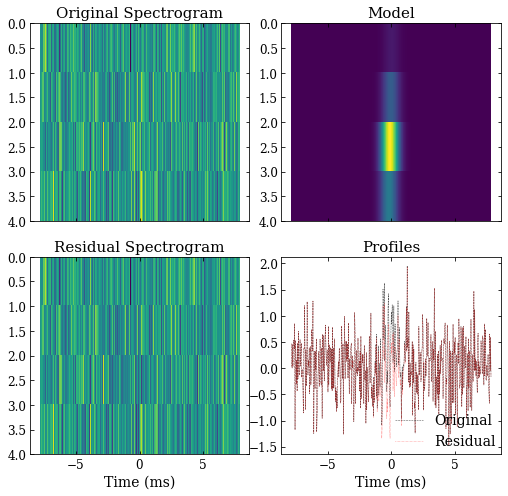

2022-06-08 21:52:55,322 - model -burstfit.fit - INFO - Making model.
2022-06-08 21:52:55,325 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 21:52:55,330 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 21:52:55,332 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 21:52:55,334 - model -burstfit.fit - INFO - Making model.
2022-06-08 21:52:55,336 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 21:52:55,339 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.0091868135645348
2022-06-08 21:52:55,340 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-08 21:52:55,341 - fitall -burstfit.fit - INFO - Final number of components 2 > 1. Fitting all components together.
2022-06-08 21:52:55,343 - fit_all_components -burstfit.fit - INFO - Fitting 2 components together.
2022-

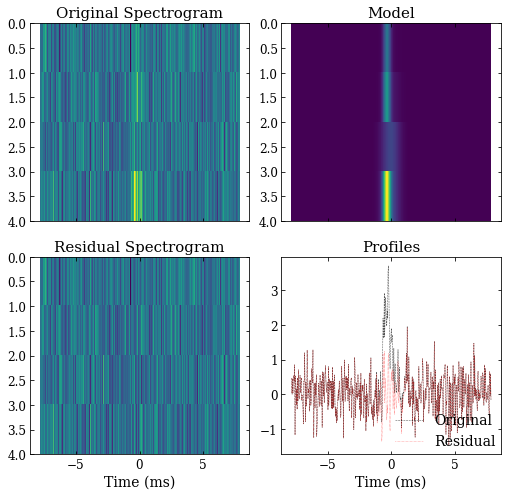

2022-06-08 21:52:56,844 - model -burstfit.fit - INFO - Making model.
2022-06-08 21:52:56,848 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 21:52:56,856 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 21:52:56,858 - get_off_pulse_region -burstfit.fit - INFO - Using sgram all-component-fit parameters.
2022-06-08 21:52:56,860 - model -burstfit.fit - INFO - Making model.
2022-06-08 21:52:56,862 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 21:52:56,866 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.022704223309763
2022-06-08 21:52:56,868 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 21:52:56,869 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 21:52:56,873 - tests -root - INFO - P values: T-test (0.17058), Kruskal (0.30119), KS (0.27301), F-test (0.32473)
2022-06-08 21:52

{bf}.calc_redchisq()= 1.022704223309763


In [14]:
bf_S1T2_c2 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t', 'tau'], pulse_fn, 
          [(0, 200, 0, 0),(np.inf, 300, 10*bd.width, np.inf)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 2, plot = True)


### Run MCMC after checking all curvfit results

2022-06-08 21:52:56,932 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-08 21:52:56,935 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [2.17547666e-01 3.27577678e-01 2.53218291e-01 1.77234542e+02
 2.30896016e+02 9.61560462e+00 6.12641646e+02]
2022-06-08 21:52:56,938 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-08 21:52:56,940 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-08 21:52:56,941 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)*max_sigma_t_prior. Setting its min value of prior to 0.
2022-06-08 21:52:56,961 - run_mcmc -burstfit.mcmc - INFO - Running MCMC with the following parameters: nwalkers=60, nsteps=5000, start_pos_dev=0.01, ncores=4, skip=500
2022-06-08 21:52:56,963 - run_mcmc -burstfit.mcmc - INFO - Priors used in MCMC are:
2022-06-08 21:52:56,965 - run_mcmc -burst

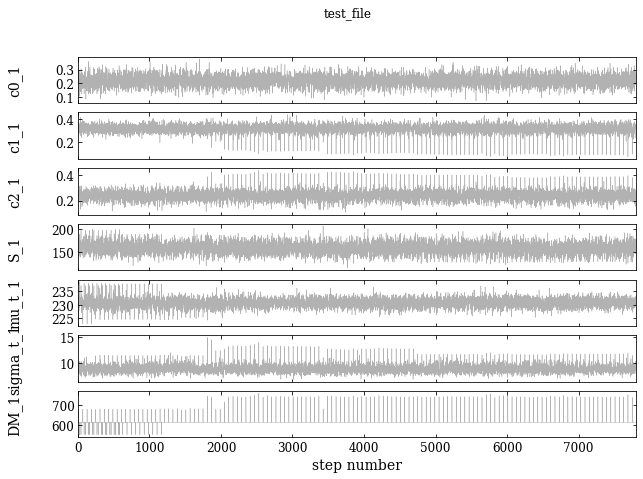

<Figure size 432x288 with 0 Axes>

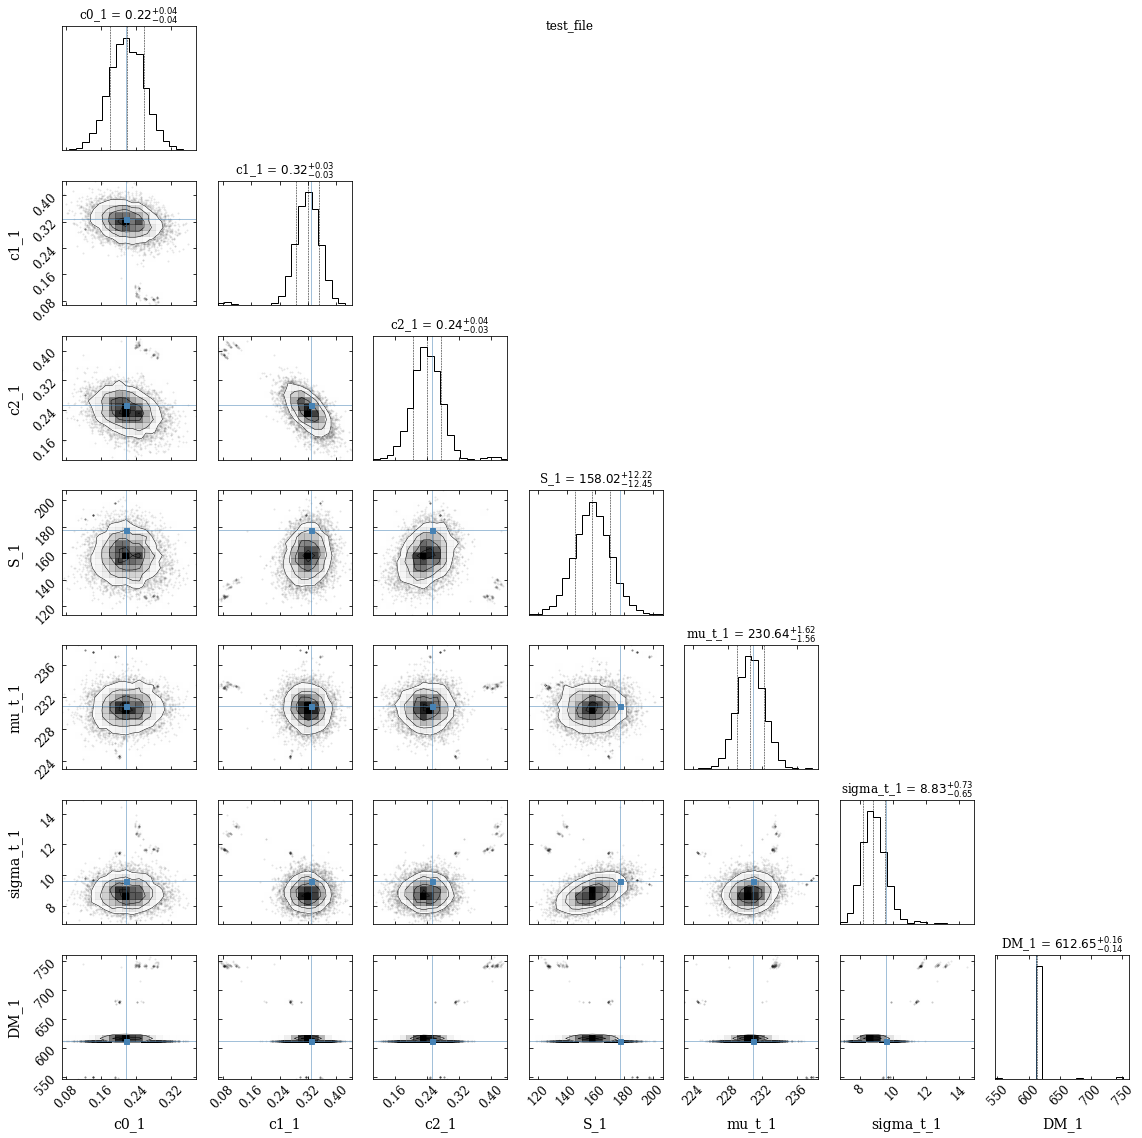

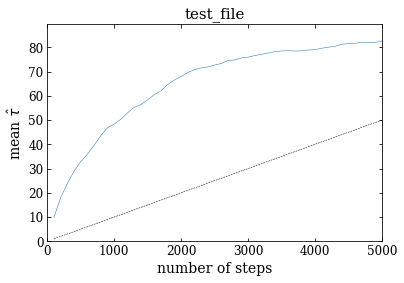

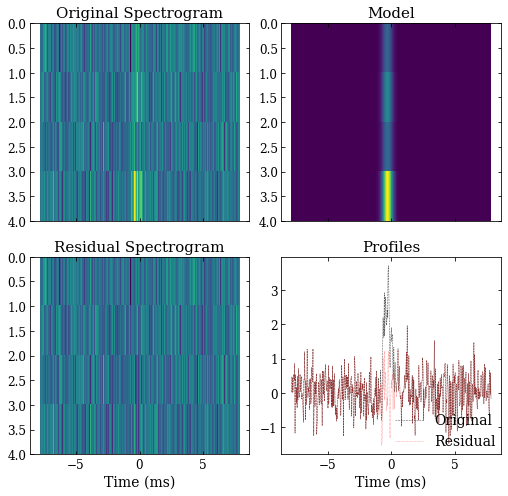

{bf}.bic =  1618.4244774610145


0

In [15]:
paper_fit.fit_paper_mcmc_bic(bf_S1T1_c1, mcmc=True, nsteps = 5000) # 10000 out of storage? 

2022-06-08 21:57:27,889 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-08 21:57:27,892 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [2.17547666e-01 3.27577678e-01 2.53218291e-01 1.77234542e+02
 2.30896016e+02 9.61560462e+00 6.12641646e+02 4.46514177e-01
 1.80724781e-01 2.68927283e-01 2.03287291e+01 2.74529640e+02
 2.40414828e+00 6.12909986e+02]
2022-06-08 21:57:27,895 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-08 21:57:27,897 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-08 21:57:27,899 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)*max_sigma_t_prior. Setting its min value of prior to 0.
2022-06-08 21:57:27,910 - run_mcmc -burstfit.mcmc - INFO - Running MCMC with the following parameters: nwalkers=60, nsteps=5000, start_pos_dev=0.01, ncores=4, skip=500
2022-06-08 21:57:2

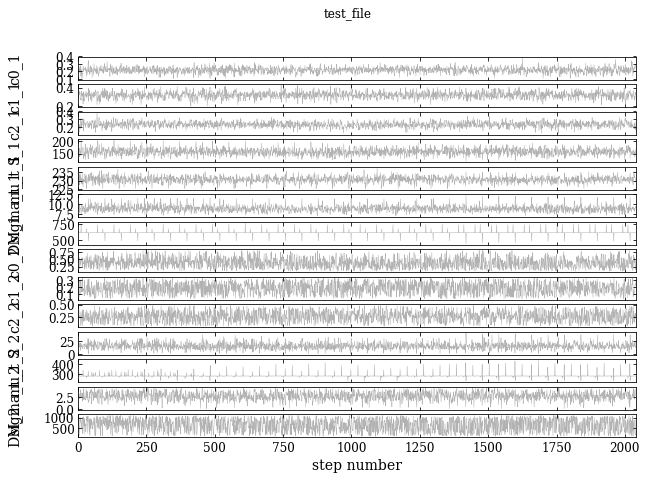

<Figure size 432x288 with 0 Axes>

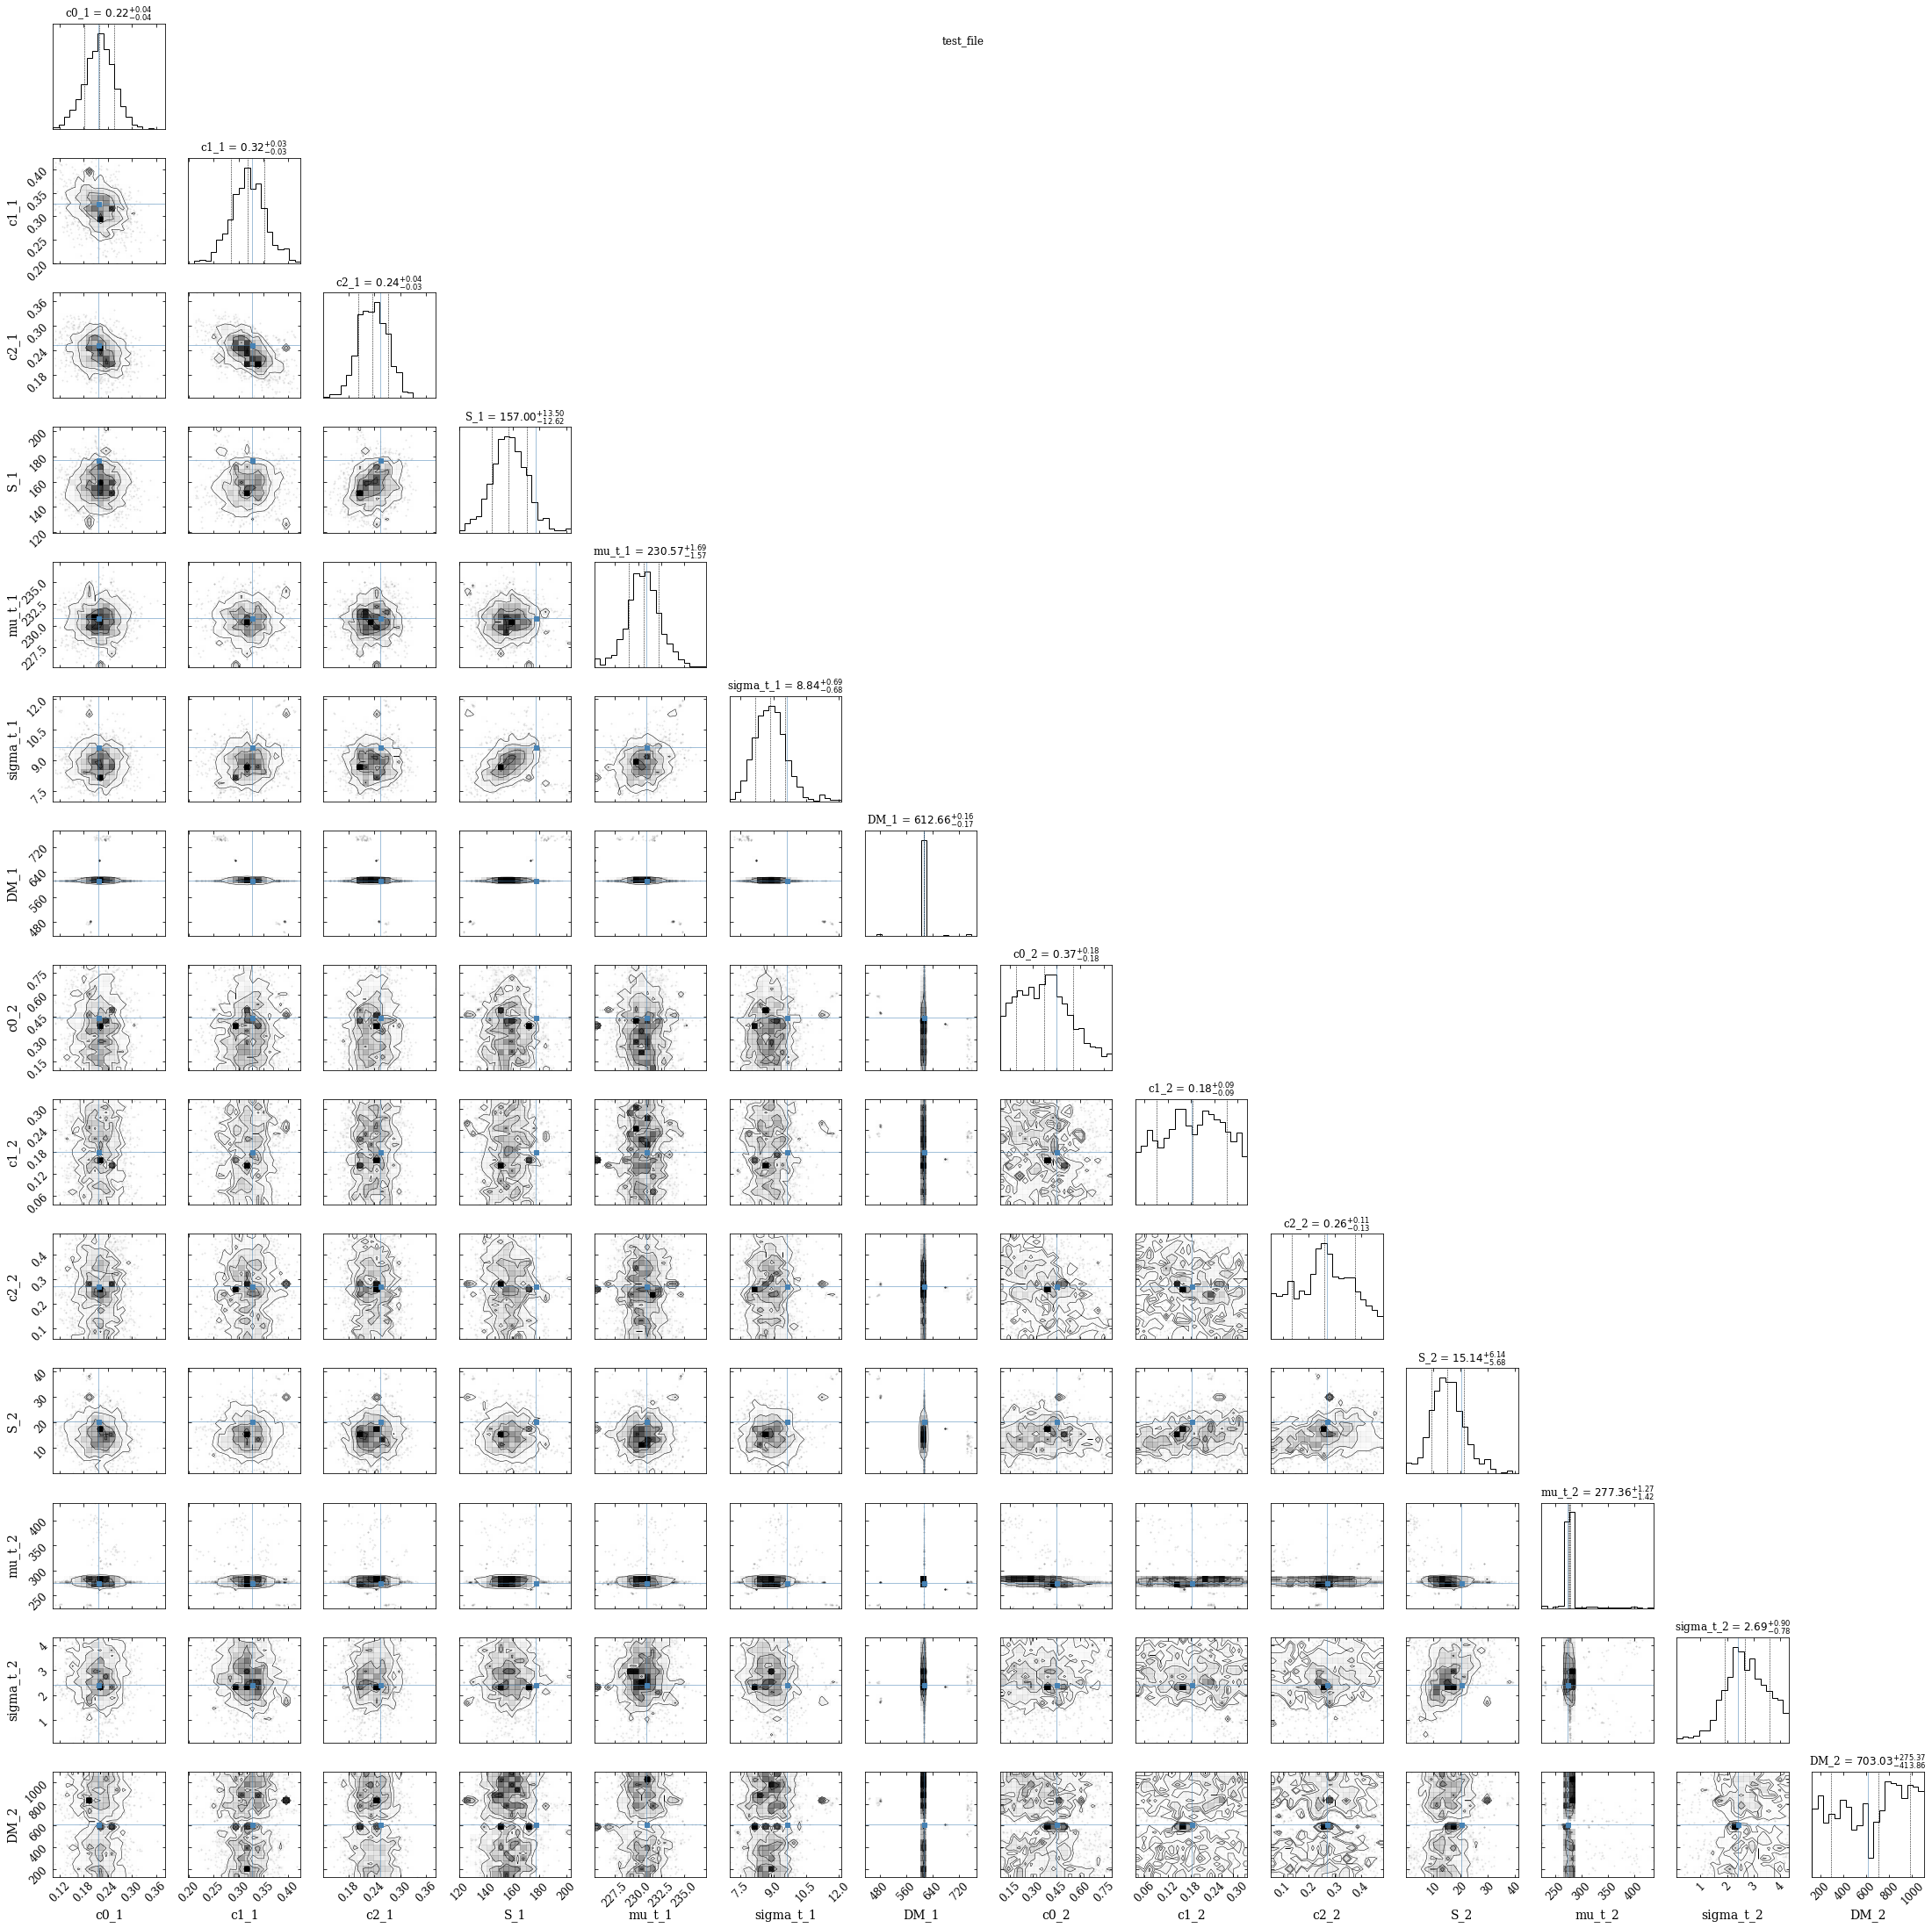

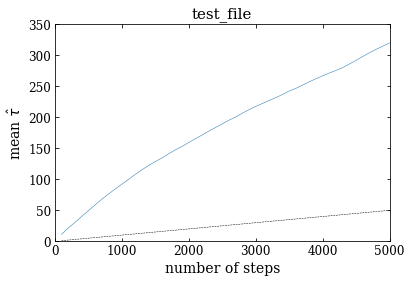

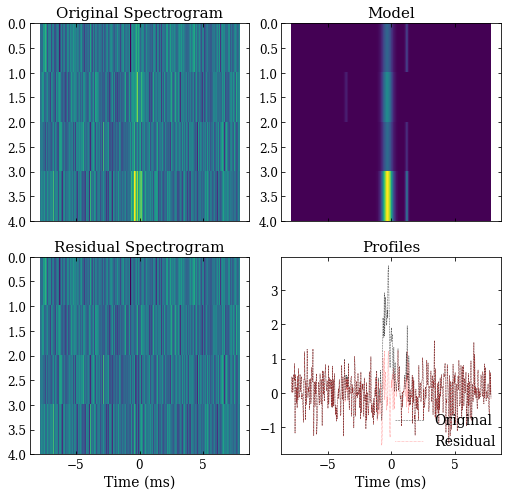

{bf}.bic =  1649.1860638994856


0

In [16]:
paper_fit.fit_paper_mcmc_bic(bf_S1T1_c2, mcmc=True, nsteps = 5000)

2022-06-08 22:03:22,980 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-08 22:03:22,982 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [2.22353052e-01 3.33724615e-01 2.65101237e-01 1.92570360e+02
 2.30404158e+02 8.51295570e+00 4.56434456e-01 6.12661626e+02]
2022-06-08 22:03:22,985 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-08 22:03:22,986 - set_priors -burstfit.mcmc - INFO - Found tau in param_names. Setting its min value of prior to 0.
2022-06-08 22:03:22,988 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-08 22:03:22,989 - set_priors -burstfit.mcmc - INFO - Found sigma_t and tau in param_names. Setting its max value of prior to 2*(max_tau_prior(0.8215820210754561) + max_sigma_t_prior(15.323320255761901))
2022-06-08 22:03:22,990 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)

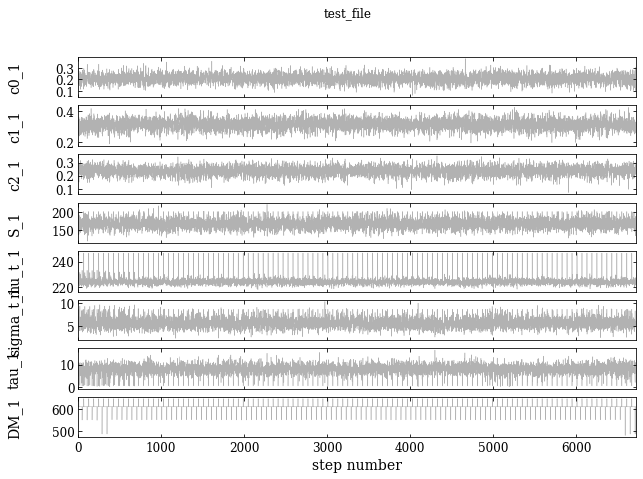

<Figure size 432x288 with 0 Axes>

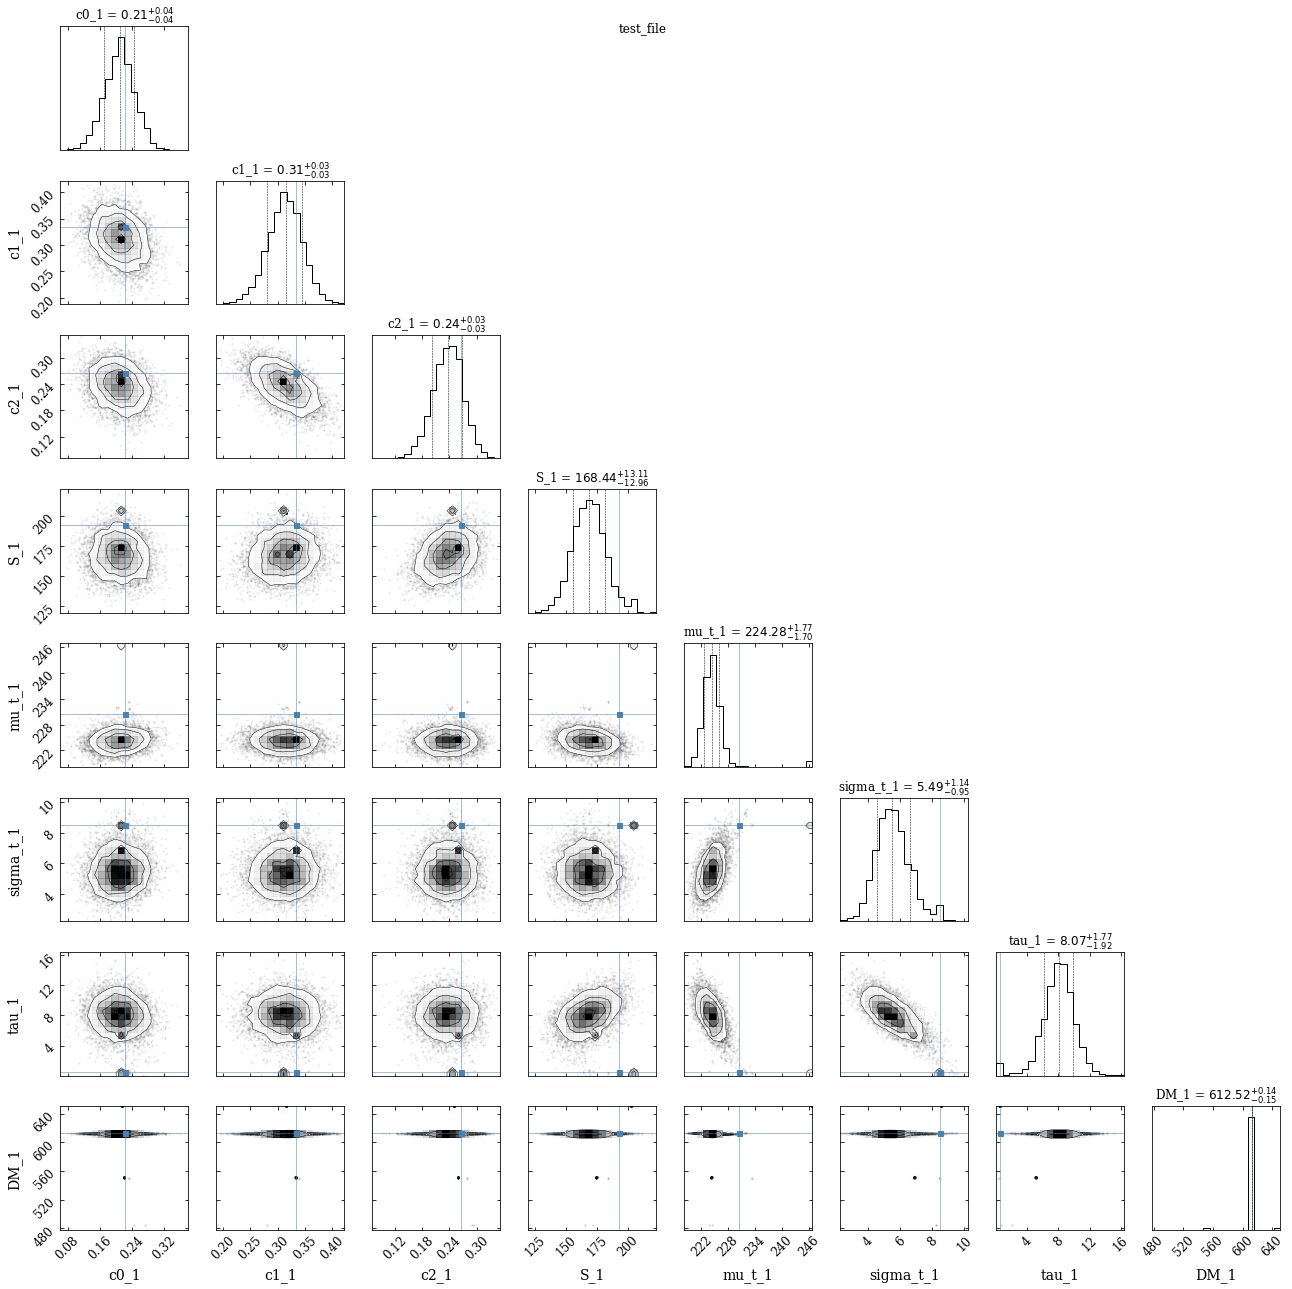

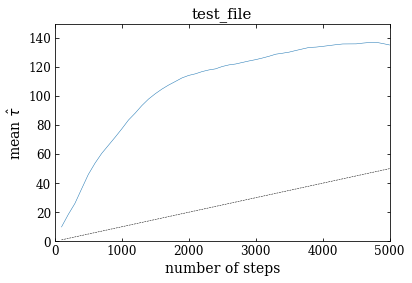

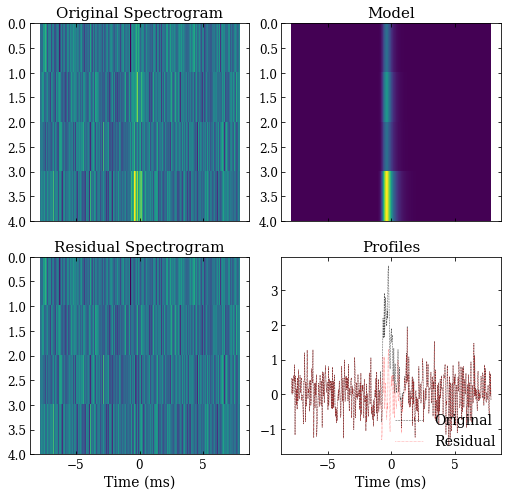

{bf}.bic =  1635.0229203081508


0

In [17]:
paper_fit.fit_paper_mcmc_bic(bf_S1T2_c1, mcmc=True, nsteps = 5000)

2022-06-08 22:08:51,614 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-08 22:08:51,615 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [ 6.61874661e-01  8.50713846e-01 -9.07064121e-01  4.73855625e+01
  2.30143287e+02  6.32235396e+00  9.12917668e-01  6.12436590e+02
  4.06293135e-02  1.55161277e-01  5.41915684e-01  7.80577884e+01
  2.39645348e+02  1.53545190e+01  1.00000000e+00  6.12458135e+02]
2022-06-08 22:08:51,617 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-08 22:08:51,619 - set_priors -burstfit.mcmc - INFO - Found tau in param_names. Setting its min value of prior to 0.
2022-06-08 22:08:51,621 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-08 22:08:51,623 - set_priors -burstfit.mcmc - INFO - Found sigma_t and tau in param_names. Setting its max value of prior to 2*(max_tau_prior(1.8) + max_sigma_t_prior(27.63813413402613))
2022-06-08 22:08:51,

2022-06-08 22:12:28,906 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-08 22:12:28,966 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-08 22:12:29,063 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-08 22:12:29,124 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-08 22:12:29,197 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-08 22:12:29,265 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-08 22:12:29,350 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-08 22:12:29,437 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-08 22:12:29,526 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-08 22:12:29,643 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-08 22:12:29,704 - hist2d -root - WARNING - Too few points to create valid contours

2022-06-08 22:12:35,807 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-08 22:12:35,873 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-08 22:12:35,947 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-08 22:12:36,031 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-08 22:12:36,218 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-08 22:12:36,310 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-08 22:12:36,453 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-08 22:12:36,652 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-08 22:12:36,792 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-08 22:12:36,855 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-08 22:12:36,919 - hist2d -root - WARNING - Too few points to create valid contours

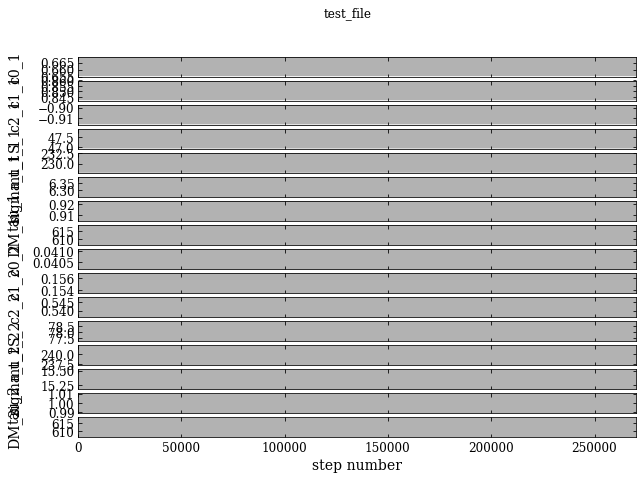

<Figure size 432x288 with 0 Axes>

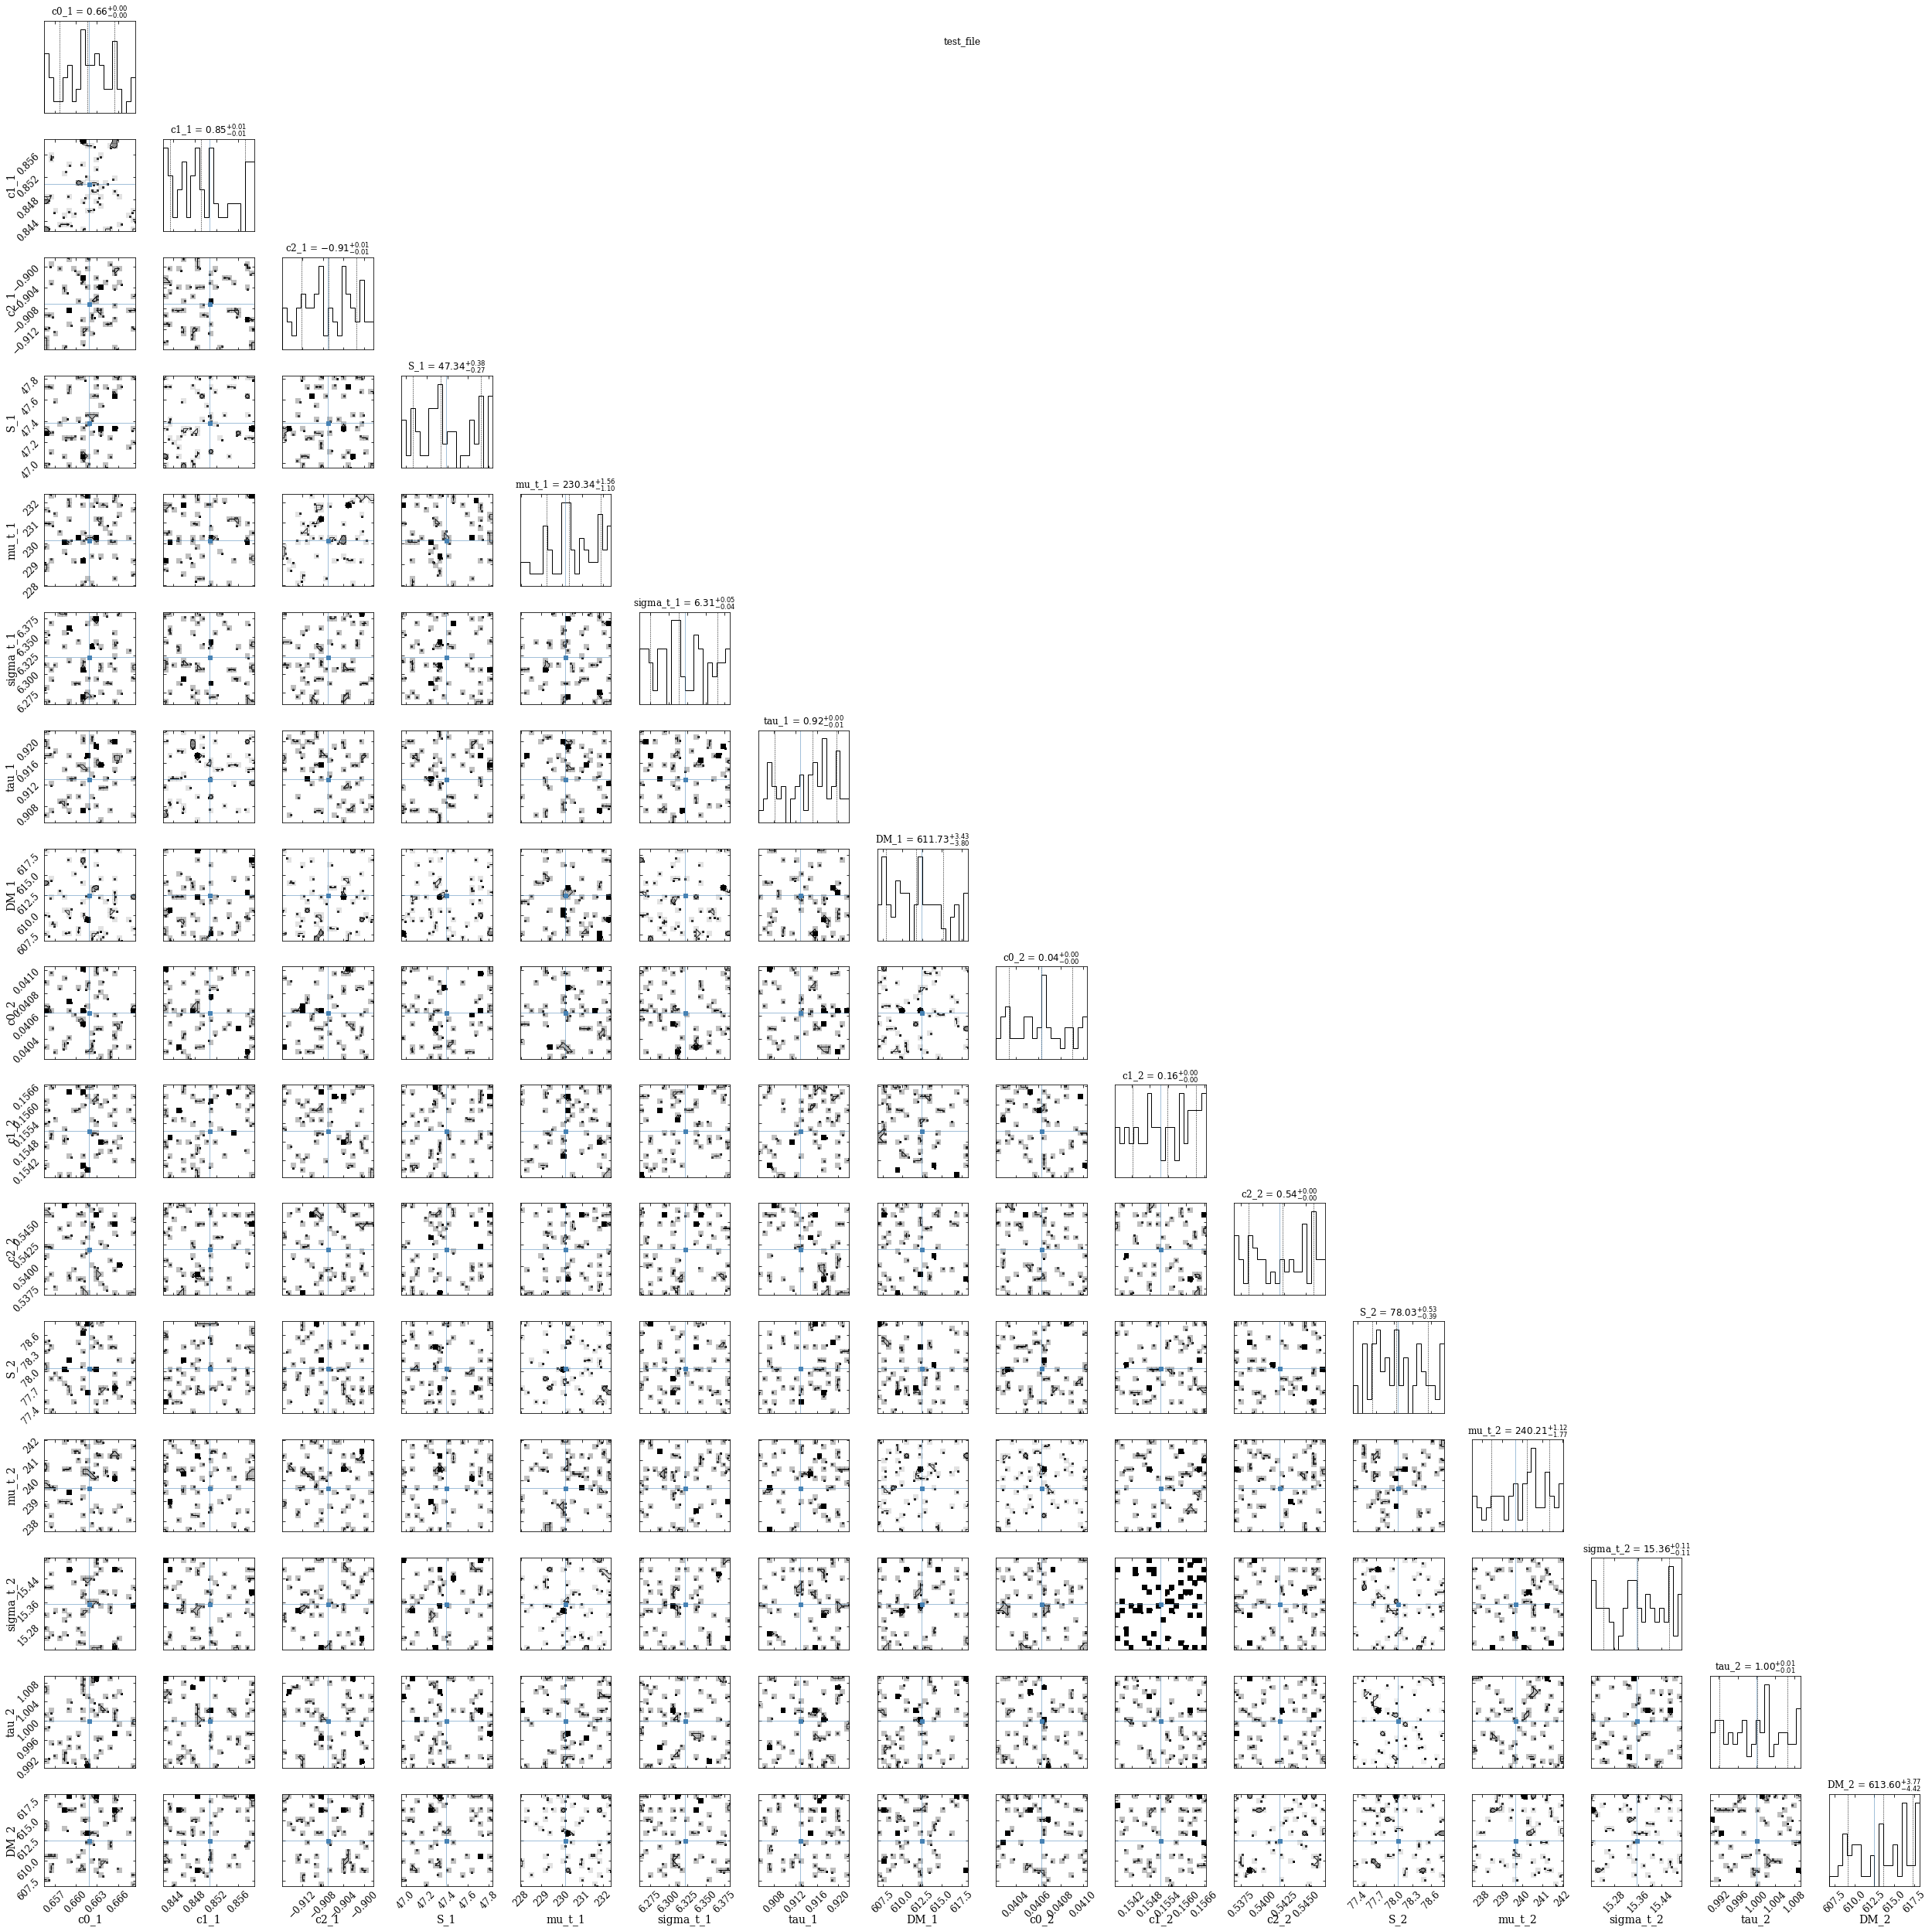

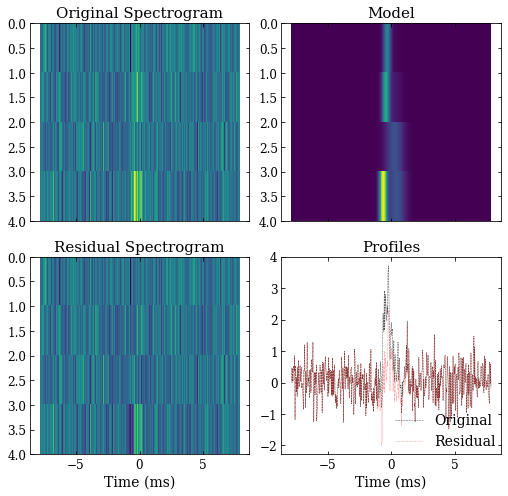

{bf}.bic =  1689.6268836448362


0

In [18]:
paper_fit.fit_paper_mcmc_bic(bf_S1T2_c2, mcmc=True, nsteps = 5000)

### select model and save results 

In [20]:
def select_model(bf_name_list):
    bf_with_bic_list = []
    bic_list = []
    
    for name in bf_name_list:

        if name in globals() or name in locals():
            bf = globals()[name]

            if bf.bic is None: 
                print("%s.bic not found"%name)

            else:         
                bf_with_bic_list = np.append(bf_with_bic_list, name)
                bic_list = np.append(bic_list, bf.bic)
        
        else:
            print("%s not used"%name)

    sorted_bf = ([x for _,x in sorted(zip(bic_list, bf_with_bic_list))])  
    sorted_bic = sorted(bic_list)

    print(sorted_bf) 
    print(sorted_bic)
    
    return sorted_bf, sorted_bic


def save_results(file, candidate, bf_name):
    bf_best = globals()[bf_name]
    with open(file, "a") as f:
        print(candidate, file=f)
        print(bf_name, file=f)
        for ncomp in range(bf_best.ncomponents):
            for i in range(len(bf_best.param_names)):
                print("${:.4}^{{+{:.2}}}_{{-{:.2}}}$".format(bf_best.mcmc_params[ncomp + 1]['popt'][i], 
                                                             bf_best.mcmc_params[ncomp + 1]['perr'][i][0], 
                                                             bf_best.mcmc_params[ncomp + 1]['perr'][i][1]),
                     file=f) 
                
        print("\n", file = f)
    
    return 0



# sorted_bf, sorted_bic = paper_fit.select_model(["bf_S1T1_c1", "bf_S1T1_c2", "bf_S1T1_c3", "bf_S1T2_c1", "bf_S1T2_c2", "bf_S1T2_c3"])
# paper_fit.save_results(file, candidate, bf_name)

sorted_bf, sorted_bic = select_model(["bf_S1T1_c1", "bf_S1T1_c2", "bf_S1T1_c3", "bf_S1T2_c1", "bf_S1T2_c2", "bf_S1T2_c3"])

file = "paper_fit_result.txt"
bf_name = sorted_bf[0]
save_results(file, candidate, bf_name)

bf_S1T1_c3 not used
bf_S1T2_c3 not used
['bf_S1T1_c1', 'bf_S1T2_c1', 'bf_S1T1_c2', 'bf_S1T2_c2']
[1618.4244774610145, 1635.0229203081508, 1649.1860638994856, 1689.6268836448362]
